# Esame del 28/01/2020
Il datataset trainMobile.csv ([preso da kaggle](https://www.kaggle.com/iabhishekofficial/mobileprice-classification)) contiene dati relativi a telefoni cellulare

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data/phone_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Parte 1: Analisi
## 1.1
Quante sono le istanze contenute nel dataset? **2000** Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)? **NO** Il dataset è bilanciato per quanto riguarda la classe da predire? **SI**


In [2]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [3]:
df.groupby("price_range")["blue"].count()

price_range
0    500
1    500
2    500
3    500
Name: blue, dtype: int64

In [3]:
y = df["price_range"]
for i in range(4):
    where = np.where(y == i)
    lung = len(where[0])
    print("lunghezza di "+ str(i) +" : ",lung)

lunghezza di 0 :  500
lunghezza di 1 :  500
lunghezza di 2 :  500
lunghezza di 3 :  500


## 1.2
La variabile sc_w assume valori discreti o continui? Analizzare la distribuzione dei valori e
verificare se i telefoni costosi hanno mediamente una dimensione superiore di schermo.
Verificare se eliminando gli elementi con sc_w uguale a 0 il risultato cambia

In [4]:
df['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

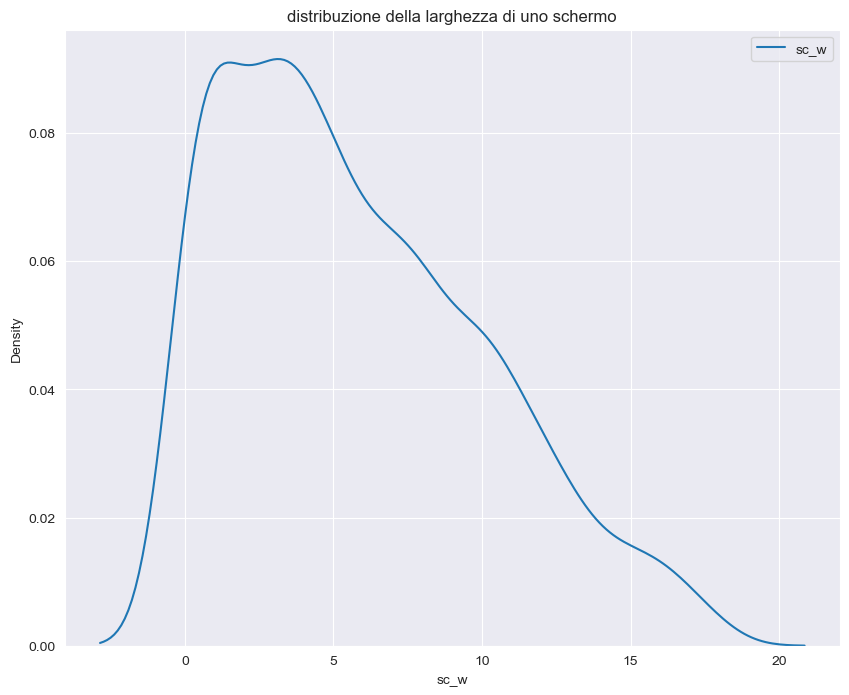

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo")

sns.kdeplot(df["sc_w"],ax=ax1, label ="sc_w")


plt.legend()

In [6]:
df_length = df.loc[df.sc_w > 15]
for i in range(4):
    where = np.where(df_length['price_range'] == i)
    lung = len(where[0])
    print("lunghezza di "+ str(i) +" : ",lung)

lunghezza di 0 :  8
lunghezza di 1 :  10
lunghezza di 2 :  16
lunghezza di 3 :  22


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'distribuzione della larghezza di uno schermo in rapporto con il costo'}, xlabel='price_range', ylabel='sc_w'>

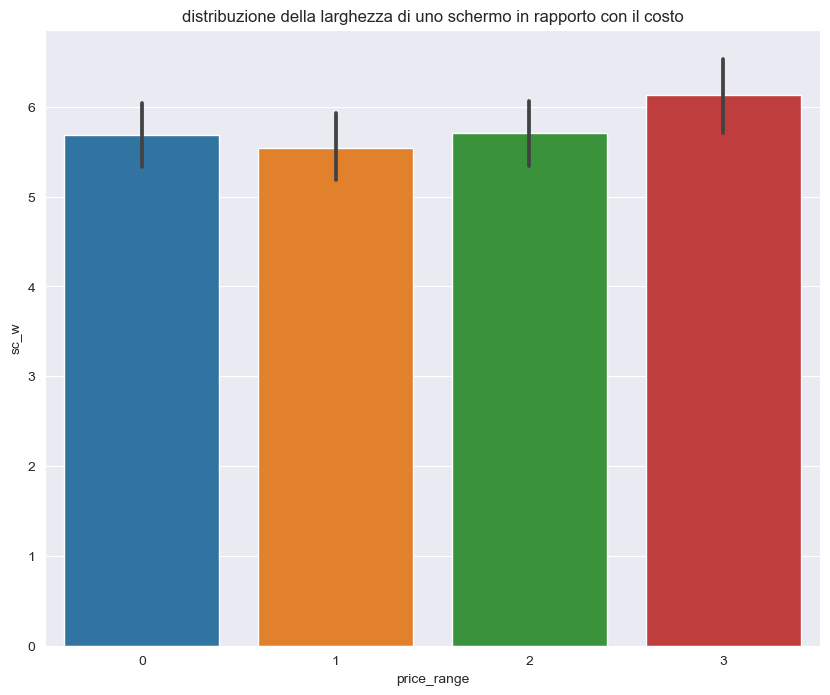

In [7]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo in rapporto con il costo")

sns.barplot(df['price_range'],df["sc_w"],ax=ax1)




In [8]:
df_deleted = df.loc[df.sc_w != 0]
df_deleted

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


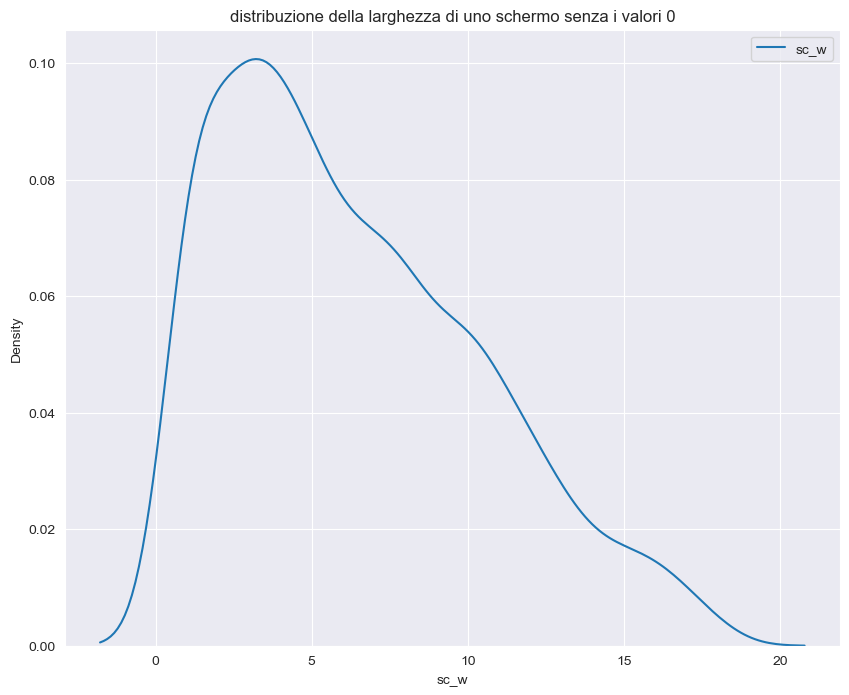

In [9]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo senza i valori 0")

sns.kdeplot(df_deleted["sc_w"],ax=ax1, label ="sc_w")


plt.legend()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'distribuzione della larghezza di uno schermo in rapporto con il costo senza gli zero'}, xlabel='price_range', ylabel='sc_w'>

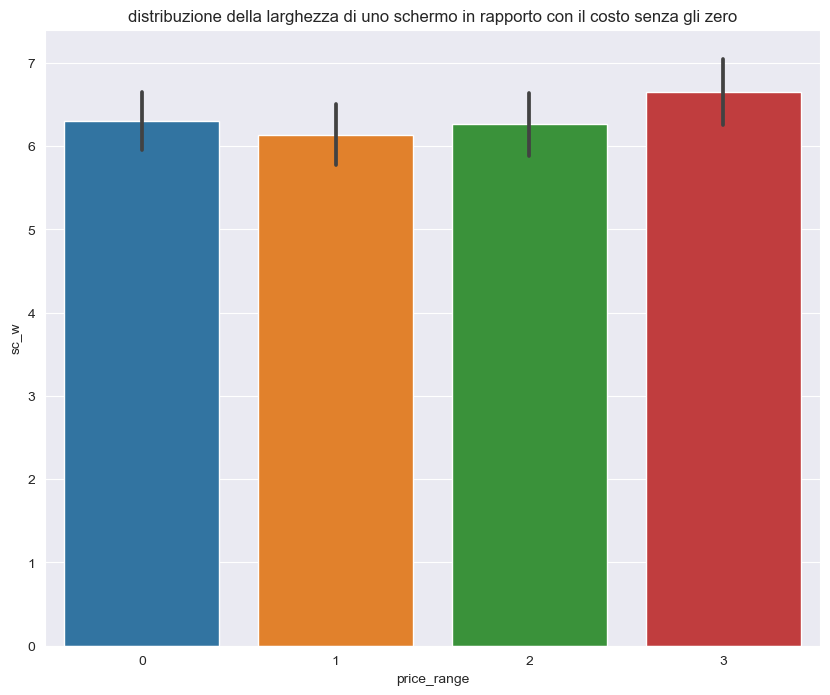

In [10]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo in rapporto con il costo senza gli zero")

sns.barplot(df_deleted['price_range'],df_deleted["sc_w"],ax=ax1)




## 1.3
E’ vero che mediamente i telefoni meno costosi hanno anche una batteria meno potente?
Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione
dei valori di battery power per ogni categoria

<AxesSubplot:title={'center':'distribuzione della larghezza di uno schermo in rapporto con la durata della  batteria '}, xlabel='battery_power', ylabel='Count'>

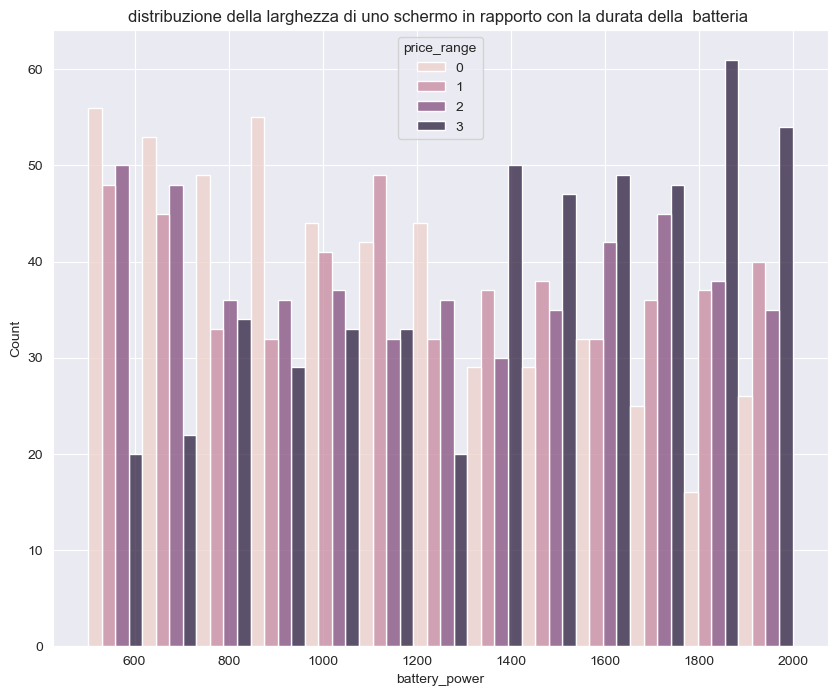

In [11]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della larghezza di uno schermo in rapporto con la durata della  batteria ")

sns.histplot(data=df, x='battery_power',hue='price_range',multiple='dodge')



## 1.4
Verificare se tutti i telefoni che hanno il 4G hanno anche il 3G
 Risposta = 263

In [12]:
g_4 = df.loc[df.four_g == 1]
g_4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [13]:
g_4.loc[g_4.three_g == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


## 1.5
Quanti sono i telefoni 4G che non hanno wifi e bluetooth?

In [14]:
g_4.loc[(g_4.wifi == 0) & (g_4.blue == 0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
27,956,0,0.5,0,1,1,41,1.0,143,7,...,511,1075,3286,17,8,12,1,1,0,3
43,1656,0,1.0,0,5,1,34,0.1,166,3,...,880,1456,1629,15,12,14,1,1,0,1
55,1936,0,2.1,1,10,1,46,0.6,104,3,...,667,1036,2552,14,7,13,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1191,0,0.8,0,6,1,46,0.8,89,6,...,42,807,824,19,18,7,1,0,0,0
1977,1379,0,1.1,1,1,1,18,0.2,129,2,...,838,885,2358,10,5,15,1,1,0,2
1979,1614,0,1.2,0,1,1,9,0.1,161,3,...,173,1219,1832,15,8,11,1,0,0,1
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3


# Parte 2: Trasformazione e Predizione
## 2.1
 Si vuole predire il valore di price_range sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e
1/4 nel dataset “test”

In [22]:
df_deleted = df.drop("price_range",axis=1)
df_deleted

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_deleted,y,test_size=0.25,random_state=0)



Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix

In [24]:
from sklearn.utils.multiclass import unique_labels
class_names = ["0","1","2","3"]
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


accuracy of DT :  0.804
Confusion matrix, without normalization
[[113  11   0   0]
 [ 10  80  20   0]
 [  0  16  85  24]
 [  0   0  17 124]]
accuracy of LR :  0.65
Confusion matrix, without normalization
[[104  18   2   0]
 [ 17  63  25   5]
 [  0  33  58  34]
 [  0   2  39 100]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


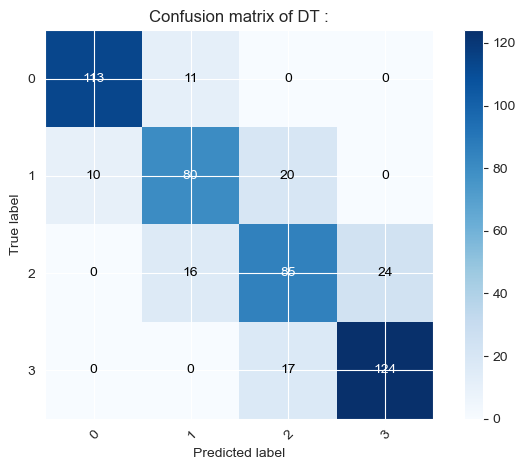

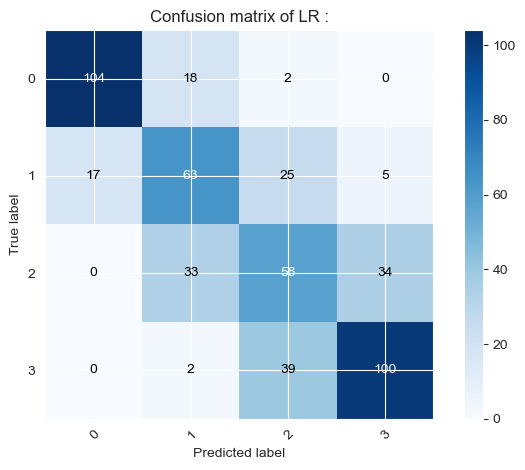

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

classifier = [DecisionTreeClassifier(), LogisticRegression()]
names = ["DT","LR"]

for name,model in zip(names,classifier):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    print('accuracy of '+ name +' : ',score)
    plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of '+name+' :')

## Considerazioni:
- Il DT riesce perfettamente a predire corettamente , e trova piú difficile predire la classe 1 e 2
- Il LR predice peggio, soprattuto le classi dei telefoni tra l'uno e il due

## 2.2
 Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un
una 10 Fold cross validation

In [26]:
from sklearn.model_selection import cross_val_score
model_dt = classifier[0]
scores = cross_val_score(model_dt,df_deleted,y,cv=10)


In [27]:
scores

array([0.82, 0.86, 0.84, 0.81, 0.86, 0.84, 0.82, 0.81, 0.85, 0.81])

In [28]:
scores.mean()

0.833

## 2.3
Utilizzare la funzione di gridSearchCV per trovare i parametri migliori del classificatore
decision tree. Agire sui parametri criterion, max_features e min_samples_split. Vericare se
l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al
punto 1

In [29]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':('gini','entropy','log_loss'),'max_features':('auto','sqrt','log2'),'min_samples_split':[2,3,1]}
grid_model = GridSearchCV(model_dt,params,cv=10)
grid_model.fit(df_deleted,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': [2, 3, 1]})

In [30]:
grid_model.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 3}

In [31]:
grid_model.best_score_

0.687

In [32]:
model_dt.set_params(**grid_model.best_params_)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=3)

accuracy of:  0.714
Confusion matrix, without normalization
[[ 99  24   1   0]
 [ 25  62  23   0]
 [  1  32  78  14]
 [  0   1  22 118]]


<AxesSubplot:title={'center':'Confusion matrix :'}, xlabel='Predicted label', ylabel='True label'>

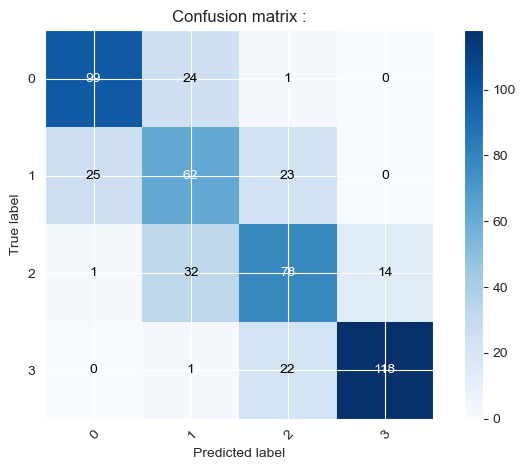

In [33]:
model_dt.fit(X_train,y_train)
pred = model_dt.predict(X_test)
score = accuracy_score(y_test,pred)
print('accuracy of: ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix :')

## 2.4
Utilizzare la funzione MaxAbsScaler per scalare i valori del dataset tra 0 e 1 e confrontare se
l’accuratezza ottenuta con il Decision Tree Classifier migliora

In [34]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(df_deleted)

MaxAbsScaler()

In [35]:
df_scaled = scaler.transform(df_deleted)
df_scaled

array([[0.42, 0.  , 0.73, ..., 0.  , 0.  , 1.  ],
       [0.51, 1.  , 0.17, ..., 1.  , 1.  , 0.  ],
       [0.28, 1.  , 0.17, ..., 1.  , 1.  , 0.  ],
       ...,
       [0.96, 0.  , 0.3 , ..., 1.  , 1.  , 0.  ],
       [0.76, 0.  , 0.3 , ..., 1.  , 1.  , 1.  ],
       [0.26, 1.  , 0.67, ..., 1.  , 1.  , 1.  ]])

accuracy of:  0.822
Confusion matrix, without normalization
[[112  12   0   0]
 [ 11  84  15   0]
 [  0  15  91  19]
 [  0   1  16 124]]


<AxesSubplot:title={'center':'Confusion matrix :'}, xlabel='Predicted label', ylabel='True label'>

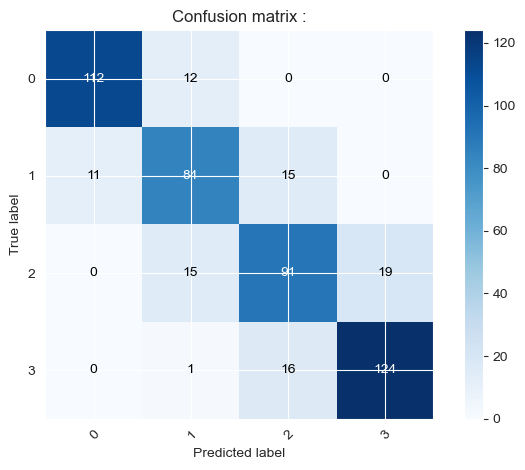

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled,y,test_size=0.25,random_state=0)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred = model_dt.predict(X_test)
score = accuracy_score(y_test,pred)
print('accuracy of: ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix :')

## 2.5
Discretizzare il valore di ram in 4 intervalli e verificare se l’accuratezza ottenuta con il
Decision Tree Classifier migliora

In [61]:
df["ram"]

0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int64

In [62]:
from sklearn.preprocessing import KBinsDiscretizer
ram_in_df = pd.DataFrame(df['ram'])

kbin = KBinsDiscretizer(n_bins=4,encode='ordinal')
kbin.fit(ram_in_df)


df_changed = df_deleted.copy()
df_changed['ram'] =  kbin.transform(ram_in_df)
df_changed

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2.0,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2.0,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2.0,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2.0,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1.0,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,0.0,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,1.0,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,2.0,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,0.0,18,10,19,1,1,1


accuracy of:  0.74
Confusion matrix, without normalization
[[108  16   0   0]
 [ 15  73  21   1]
 [  0  29  78  18]
 [  0   0  30 111]]


<AxesSubplot:title={'center':'Confusion matrix :'}, xlabel='Predicted label', ylabel='True label'>

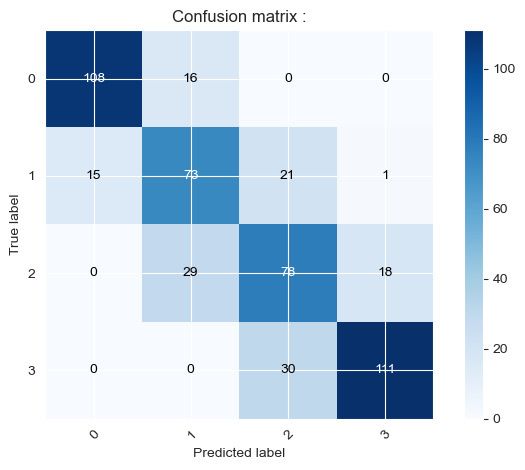

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_changed,y,test_size=0.25,random_state=0)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred = model_dt.predict(X_test)
score = accuracy_score(y_test,pred)
print('accuracy of: ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix :')

## 2.6
 Creare una pipeline in cui il valore di ram sia discretizzato in 4 intervalli, il valore di
battery_power sia discretizzato in 10 intervalli e poi il dataset venga ricondotto a valori
nell’intervallo (0,1) e normalizzato con la funzione Normalizer. Si applichi poi un modello
DecisionTree. [Alternativa: non applicare la discretizzazione]

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocess_columns = ColumnTransformer(
    transformers=[('ram_bin',KBinsDiscretizer(n_bins=4,encode='ordinal'),["ram"]),
                  ('battery_bin',KBinsDiscretizer(n_bins=10,encode='ordinal'),['battery_power'])],remainder="passthrough"
)
preprocess_columns

ColumnTransformer(remainder='passthrough',
                  transformers=[('ram_bin',
                                 KBinsDiscretizer(encode='ordinal', n_bins=4),
                                 ['ram']),
                                ('battery_bin',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10),
                                 ['battery_power'])])

In [79]:
df_deleted

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [74]:
verify = preprocess_columns.fit_transform(df_deleted)
verify

array([[2., 2., 0., ..., 0., 0., 1.],
       [2., 3., 1., ..., 1., 1., 0.],
       [2., 0., 1., ..., 1., 1., 0.],
       ...,
       [2., 9., 0., ..., 1., 1., 0.],
       [0., 6., 0., ..., 1., 1., 1.],
       [3., 0., 1., ..., 1., 1., 1.]])

In [76]:
from sklearn.preprocessing import Normalizer
preprocess_trasform = Pipeline(steps=[
                ('scale_01',MaxAbsScaler()),
                ('norma',Normalizer())
])

In [77]:
my_pipeline = Pipeline(steps=[('preprocessor_columns',preprocess_columns),
                              ('preprocessor_trasform',preprocess_trasform),
                              ('model_dt',model_dt)],verbose=True)


[Pipeline]  (step 1 of 3) Processing preprocessor_columns, total=   0.0s
[Pipeline]  (step 2 of 3) Processing preprocessor_trasform, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing model_dt, total=   0.0s
accuracy of:  0.7233333333333334
Confusion matrix, without normalization
[[127  24   0   0]
 [ 25  85  23   2]
 [  0  25  96  30]
 [  0   3  34 126]]


<AxesSubplot:title={'center':'Confusion matrix :'}, xlabel='Predicted label', ylabel='True label'>

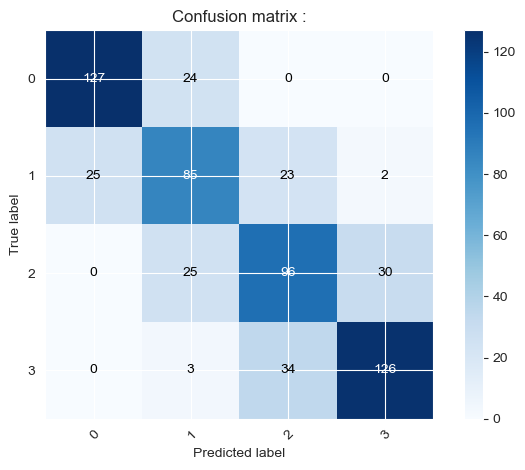

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_deleted,y,test_size=0.3,random_state=0)

my_pipeline.fit(X_train,y_train)

pred = my_pipeline.predict(X_test)

score = accuracy_score(y_test,pred)
print('accuracy of: ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix :')

### Alternativa  nel column trasformer

In [80]:
preprocess_columns = ColumnTransformer(
    transformers=[('ram_bin',KBinsDiscretizer(n_bins=[4,10],encode='ordinal'),["ram","battery_power"]),],remainder="passthrough"
)
preprocess_columns

ColumnTransformer(remainder='passthrough',
                  transformers=[('ram_bin',
                                 KBinsDiscretizer(encode='ordinal',
                                                  n_bins=[4, 10]),
                                 ['ram', 'battery_power'])])

In [81]:
verify = preprocess_columns.fit_transform(df_deleted)
verify

array([[2., 2., 0., ..., 0., 0., 1.],
       [2., 3., 1., ..., 1., 1., 0.],
       [2., 0., 1., ..., 1., 1., 0.],
       ...,
       [2., 9., 0., ..., 1., 1., 0.],
       [0., 6., 0., ..., 1., 1., 1.],
       [3., 0., 1., ..., 1., 1., 1.]])

In [82]:
my_pipeline = Pipeline(steps=[('preprocessor_columns',preprocess_columns),
                              ('preprocessor_trasform',preprocess_trasform),
                              ('model_dt',model_dt)],verbose=True)


[Pipeline]  (step 1 of 3) Processing preprocessor_columns, total=   0.0s
[Pipeline]  (step 2 of 3) Processing preprocessor_trasform, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing model_dt, total=   0.0s
accuracy of:  0.74
Confusion matrix, without normalization
[[130  21   0   0]
 [ 20  90  22   3]
 [  0  23  96  32]
 [  0   3  32 128]]


<AxesSubplot:title={'center':'Confusion matrix :'}, xlabel='Predicted label', ylabel='True label'>

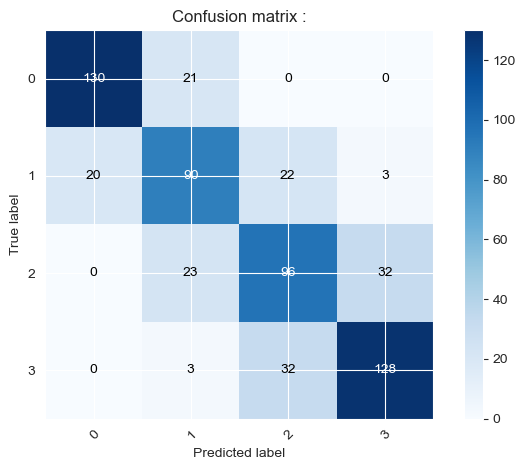

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_deleted,y,test_size=0.3,random_state=0)

my_pipeline.fit(X_train,y_train)

pred = my_pipeline.predict(X_test)

score = accuracy_score(y_test,pred)
print('accuracy of: ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix :')